In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import os

def load_images_from_folder(folder):
    images = []
    for i,filename in enumerate(os.listdir(folder)):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            images.append(img)
            images[i]=cv2.resize(images[i],(0,0),fx=0.8,fy=0.8) 
    return images

In [77]:
imgs = load_images_from_folder('Feature_ali/A')
folder = 'Feature_ali/Z'

In [87]:
folder = 'adobe_panoramas/data/fishbowl'
image_paths=['fishbowl-00.png', 'fishbowl-01.png', 'fishbowl-02.png', 'fishbowl-03.png',
             #'fishbowl-04.png', 'fishbowl-05.png', 'fishbowl-06.png', 'fishbowl-07.png',
             'fishbowl-08.png', 'fishbowl-09.png', 'fishbowl-10.png','fishbowl-11.png',
             'fishbowl-12.png']#, 'fishbowl-13.png', 'fishbowl-14.png']
            # 'D (4).jpg' , 'E (4).jpg', 'F (4).jpg']
imgs = []
for path in image_paths:
    img = cv2.imread(os.path.join(folder, path))
    imgs.append(img)
    
plt.imshow(imgs[10])
plt.show()

IndexError: list index out of range

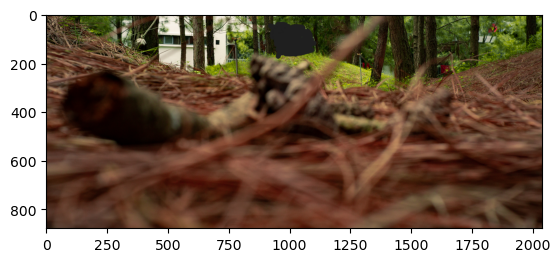

In [62]:
folder = 'Feature_ali/A'
image_paths=['Screenshot3.png', 'Screenshot4.png']# 'carmel-02.png', 'carmel-03.png',
#              'carmel-04.png', 'carmel-05.png', 'carmel-06.png', 'carmel-07.png',
#              'carmel-08.png', 'carmel-09.png', 'carmel-10.png','carmel-11.png',
#              'carmel-12.png', 'carmel-13.png', 'carmel-14.png']
            # 'D (4).jpg' , 'E (4).jpg', 'F (4).jpg']
imgs = []
for path in image_paths:
    img = cv2.imread(os.path.join(path))
    imgs.append(img)
    
plt.imshow(imgs[1][:,:,::-1])


plt.show()

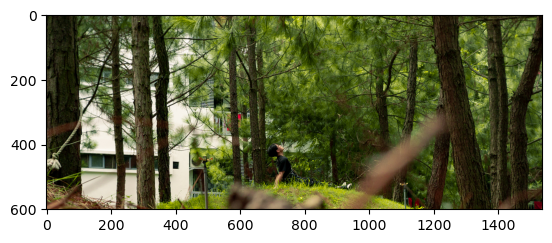

In [64]:
# stitcher = cv2.Stitcher_create()
# (status, stitched1) = stitcher.stitch(imgs[:])
# (status, stitched2) = stitcher.stitch(imgs[5:7])
plt.imshow(imgs[0][:,:,::-1])

In [ ]:
stitcher = cv2.Stitcher_create()
# (status, stitched) = stitcher.stitch([stitched1, stitched2])
(status, stitched) = stitcher.stitch(imgs)
# if the status is '0', then OpenCV successfully performed image
# stitching
# if status == 0:
    
    
# 	# write the output stitched image to disk
# 	# cv2.imwrite(args["output"], stitched)

# 	# display the output stitched image to our screen
# # otherwise the stitching failed, likely due to not enough keypoints)
# # being detected
# else:
# 	print("[INFO] image stitching failed ({})".format(status))
print(bool(status))
# stitched = cv2.resize(stitched,(0,0),fx=0.3,fy=0.3) 

cv2.imshow("Stitched", stitched)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [60]:
stitched.shape

(696, 2609, 3)

In [57]:
def alignImages2(im1, im2):
    im1Gray = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)
    im2Gray = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)

    orb = cv2.SIFT_create(MAX_MATCHES)
    keypoints1, descriptors1 = orb.detectAndCompute(im1Gray, None)
    keypoints2, descriptors2 = orb.detectAndCompute(im2Gray, None)

    # Match features.
    matcher = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
    matches = list(matcher.match(descriptors1, descriptors2, None))

    # Sort matches by score
    matches.sort(key=lambda x: x.distance, reverse=False)
    

    # Remove not so good matches
    numGoodMatches = int(len(matches) * GOOD_MATCH_PERCENT)
    matches = matches[:numGoodMatches]
    print(len(matches))

    # Draw top matches
    imMatches = cv2.drawMatches(im1, keypoints1, im2, keypoints2, matches, None)
    
    # Extract location of good matches
    points1 = np.zeros((len(matches), 2), dtype=np.float32)
    points2 = np.zeros((len(matches), 2), dtype=np.float32)

    for i, match in enumerate(matches):
        points1[i, :] = keypoints1[match.queryIdx].pt
        points2[i, :] = keypoints2[match.trainIdx].pt

    # Find homography
    h, mask = cv2.findHomography(points1, points2, cv2.RANSAC,20)

    # Use homography
    height, width, channels = im2.shape
    im1Reg = cv2.warpPerspective(im1, h, (width, height))

    return imMatches, im1Reg, h

In [74]:
img1 = cv2.imread('Feature_ali/Z/B (7).jpg')
img2 = cv2.imread('Feature_ali/Z/B (10).jpg')
MAX_MATCHES = 10
GOOD_MATCH_PERCENT = 1

imMatches, imReg, h = alignImages2(img1, img2)
print("Estimated homography : \n", h)

fig, axes = plt.subplots(1, 2, figsize=(10, 20))
fig2, axes2 = plt.subplots(1, 1, figsize=(10, 20))
fig3, axes3 = plt.subplots(1, 1, figsize=(10, 10))

for i in range(2):
        axes[i].axis('off')
axes2.axis('off')
axes3.axis('off')

axes[0].imshow(img1[:,:,::-1])
axes[0].set_title('Reference', fontsize=20)

axes[1].imshow(img2[:,:,::-1])
axes[1].set_title('Original Img', fontsize=20)

axes2.imshow(imMatches[:,:,::-1])
axes2.set_title('Top matches', fontsize=20)

axes3.imshow(imReg[:,:,::-1])
axes3.set_title('Aligned Img', fontsize=20)

plt.show()

5


error: OpenCV(4.9.0) D:\bld\libopencv_1716156177264\work\modules\imgproc\src\imgwarp.cpp:3323: error: (-215:Assertion failed) (M0.type() == CV_32F || M0.type() == CV_64F) && M0.rows == 3 && M0.cols == 3 in function 'cv::warpPerspective'
